## PROJECT 01

### by Eli Dow


## Part One: Logistic Regression for Digit Classification

### Import required libraries.

In [66]:
import os
import numpy as np
import pandas as pd

import warnings

import sklearn.linear_model
import sklearn.metrics

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

from sklearn.linear_model import LogisticRegression # part a

from scipy.ndimage.filters import gaussian_filter # part 2
from sklearn import model_selection

### Load the dataset.

In [67]:
# Load the x and y into arrays
x_train = np.loadtxt('./data_digits_8_vs_9_noisy/x_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('./data_digits_8_vs_9_noisy/x_test.csv', delimiter=',', skiprows=1)

y_train = np.loadtxt('./data_digits_8_vs_9_noisy/y_train.csv', delimiter=',', skiprows=1)
y_test = np.loadtxt('./data_digits_8_vs_9_noisy/y_test.csv', delimiter=',', skiprows=1)

### 1.1.  Fit Logistic Regression Models to the Training Data

   You will fit logistic regression models to the training data, using sklearn’s implementation of the model, with the liblinear solver: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

   Leaving all other parameters with default values, you will explore what happens when we
limit the iterations allowed for the solver to converge on its solution.

   For the values i = 1, 2, . . . , 40, build a logistic regression model with the max_iter set to i.
Fit each such model to the training data, and keep track of the accuracy of the resulting
model (via the model’s own score() function) along with the logistic loss, each measured on
the training data.†

   Produce two plots, each with the values of i as x-axis and with the accuracy/loss, respectively,
as y. Place these plots into your PDF document, with captions labeling each approp

In [68]:
warnings.filterwarnings('ignore', category=UserWarning, append=True)
def log_reg_models_vs_accuracies_and_losses(input_data, output_data):
    ''' Performs logistic regression on feature data and calculates 
        accuracies and losses for those models
    
    Args
    ----
    input_data : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in current dataset
    output_data : 1D array of floats
        Each entry represents the binary value (0 or 1)
        One entry per example in current dataset

    Returns
    -------
    iterations : 1D array of ints
        Each entry is an iteration value from 1 to 40
    accuracies : 1D array of floats
        Each entry represents the accuracy of the resulting model
    losses : 1D array of floats
        Each entry represents the logistic loss of the resulting model
    '''
    
    # initializing local variables
    total_iterations = 40
    iterations = []
    accuracies = []
    losses = []
    
    for i in range(1, (total_iterations + 1)):
        
        # appending current iteration
        iterations.append(i)
        
        # fitting logistic regression model with max iteration i
        log_reg = LogisticRegression(solver='liblinear', max_iter = i)
        log_reg.fit(input_data, output_data)
        
        # calculating accuracy for iteration
        curr_score = log_reg.score(input_data, output_data)
        accuracies.append(curr_score)
        
        # calculating logistic loss for iteration
        curr_proba = log_reg.predict_proba(input_data)
        curr_logloss = sklearn.metrics.log_loss(output_data, curr_proba)
        losses.append(curr_logloss)
    
    return iterations, accuracies, losses

# retrieving iterations, accuracy, logistic loss
iterations, accuracies, losses = log_reg_models_vs_accuracies_and_losses(x_train, y_train)


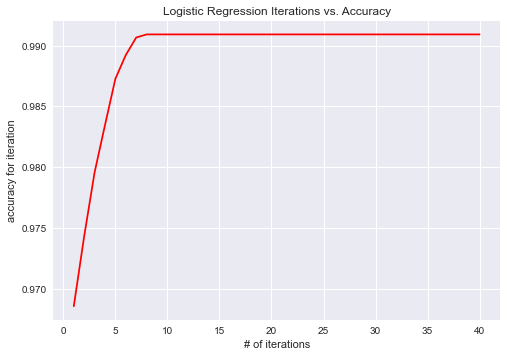

In [69]:
# Plotting iterations vs accuracy
plt.title('Logistic Regression Iterations vs. Accuracy')
plt.xlabel('# of iterations');
plt.ylabel('accuracy for iteration');
plt.plot(iterations, accuracies, color="red");

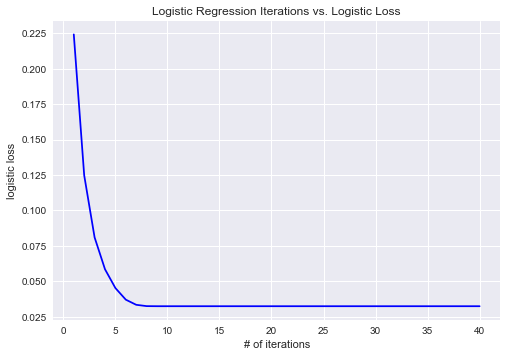

In [70]:
# Plotting iterations vs logistic loss 
plt.title('Logistic Regression Iterations vs. Logistic Loss')
plt.xlabel('# of iterations');
plt.ylabel('logistic loss');
plt.plot(iterations, losses, color="blue");

### 1.2. Plotting Relationship between Models and Feature Weights

After fitting a logistic model, you can access the weights it assigns to each feature
in the data using its coef_ attribute. For each of the i models you generated, record the
first such weight, which is the one the model applies to feature pixel000 in the input data.
Produce a plot with the values of i as x-axis and with the feature weight as y. Place this plot
into your PDF document, with a caption labeling it appropriately. Below the plot, discuss
the results you are seeing; what do they show, and why?

In [71]:
def log_reg_models_vs_feature_weights(input_data, output_data):
    ''' Performs logistic regression on feature data and calculates 
        feature weights (first weights) for those models
    
    Args
    ----
    input_data : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in current dataset
    output_data : 1D array of floats
        Each entry represents the binary value (0 or 1)
        One entry per example in current dataset

    Returns
    -------
    iterations : 1D array of ints
        Each entry is an iteration value from 1 to 40
    feature_weights : 1D array of floats
        Each entry represents the first weight pixel000 of the resulting model
    '''
    
    # initializing local variables
    total_iterations = 40
    iterations = []
    feature_weights = []
    
    for i in range(1, (total_iterations + 1)):
        
        # appending current iteration
        iterations.append(i)
        
        # fitting logistic regression model with max iteration i
        log_reg = LogisticRegression(solver='liblinear', max_iter = i)
        log_reg.fit(input_data, output_data)
        
        # calculating first weights for iteration
        curr_first_weight = log_reg.coef_[0][0]
        feature_weights.append(curr_first_weight)
    
    return iterations, feature_weights

# retrieving iterations, accuracy, logistic loss
iterations, feature_weights = log_reg_models_vs_feature_weights(x_train, y_train)


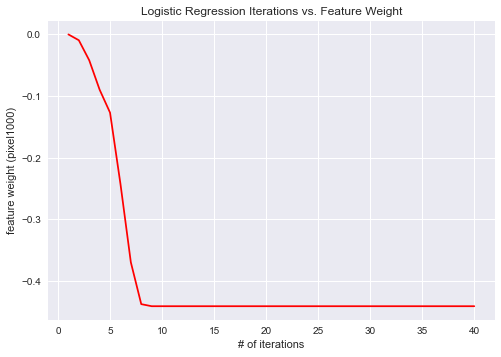

In [72]:
plt.title('Logistic Regression Iterations vs. Feature Weight')
plt.xlabel('# of iterations');
plt.ylabel('feature weight (pixel1000)');
plt.plot(iterations, feature_weights, color="red");

### 1.3.  Explore Different Values of Regularization Penalty

As in prior homework assignments, you will explore different values of regularization
penalty for the logistic model.‡ Your code should explore a range of values for this parameter,
using a regularly-spaced grid of values:

C_grid = np.logspace(-9, 6, 31)

for C in C_grid:
    
    # Build and evaluate model for each value C
    
For each such value of C create a model and fit it to the training data, and then compute the
log loss of that model on the test data. Determine which value gives you the least loss on the
test data. Record that value, along with the accuracy score of the model, in your PDF. Also
include a table for the confusion matrix of that model on the test data.

In [73]:
def log_reg_and_inverse_penalty(training_input, training_output, testing_input, y_true):
    ''' Performs logistic regression on feature data and calculates
        logistic loss for each value of a regularly-spaced grid of values
       
    Args
    ----
    training_input : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in training dataset
    training_output : 1D array of floats
        Each entry represents the binary value (0 or 1)
        One entry per example in training dataset
    testing_input : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in testing dataset
    y_true : 1D array of floats
        Each entry represents the binary value (0 or 1)
        One entry per example in testing dataset

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    FP_samples: 1D array of images
        9 sample images of false positives
    FN_samples: 1D array of images
        9 sample images of false negatives
    coefficient : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    
    # initializing local variables
    C_grid = np.logspace(-9, 6, 31)
    C_values = []
    scores = []
    losses = []
    
    # build and evaluate model for each value C
    for C_val in C_grid:

        # appending current c value
        C_values.append(C_val)
        
        # fitting logistic regression model with current C val
        log_reg = LogisticRegression(solver='liblinear', C = C_val)
        log_reg.fit(training_input, training_output)
        
        # calculating accuracy
        curr_score = log_reg.score(training_input, training_output)
        scores.append(curr_score)
        
        # calculating logistic loss for testing data
        curr_proba = log_reg.predict_proba(testing_input)
        curr_logloss = sklearn.metrics.log_loss(y_true, curr_proba)
        losses.append(curr_logloss)
    
    # find least logistic loss and corresponding C value and accuracy
    least_logloss = min(losses)
    C_for_least_logloss = C_values[losses.index(min(losses))]
    score_for_least_logloss = scores[losses.index(min(losses))]
    
    # printing least logistic loss and corresponding C value and accuracy
    print("The minimum log loss is " + str(least_logloss) + ".")
    print("The corresponding inverse penalty value is " + str(C_for_least_logloss) + ".")
    print("The corresponding accuracy value is " + str(score_for_least_logloss) + ".")
    
    # finding model/accuracy with C value for least log loss
    log_reg = LogisticRegression(solver='liblinear', C = C_for_least_logloss)
    log_reg.fit(training_input, training_output)
    y_proba1 = log_reg.predict(testing_input)
    
    # For Part 1.4: retrieving 9 sample images that are false positives/false negatives
    FP = []
    FN = []
    for i in range(len(y_true)):
        if y_proba1[i] == 1.0 and y_true[i] == 0.0:
            FP.append(np.asarray(testing_input[i]))
        elif y_proba1[i] == 0.0 and y_true[i] == 1.0:
            FN.append(np.asarray(testing_input[i]))
            
    FP_samples = FP[:9]
    FN_samples = FN[:9]
    
    # For Part 1.5: retrieving weights assigned to feature of log_reg
    coef = log_reg.coef_[0]
     
    # calculating confusion matrix of y_true and y_proba1
    cm = sklearn.metrics.confusion_matrix(y_true, y_proba1)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    
    return cm_df, FP_samples, FN_samples, coef

# retrieving confusion matrix, false positive/negative samples, weights assigned to feature
cm_inverse, FP_samples, FN_samples, coef_inverse = log_reg_and_inverse_penalty(x_train, y_train, x_test, y_test)
print(cm_inverse)


The minimum log loss is 0.08968955614249495.
The corresponding inverse penalty value is 0.03162277660168379.
The corresponding accuracy value is 0.9808474576271187.
Predicted    0    1
True               
0          942   32
1           33  976


### 1.4. Analyze Best Model's Mistakes

Analyze some of the mistakes that your best model makes. Produce two plots, one
consisting of 9 sample images that are false positives in the test set, and one consisting of 9
false negatives. You can display the images by converting the pixel data using the matplotlib
function imshow(), using the Grey colormap, with vmin=0.0 and vmax=1.0. Place each plot
into your PDF as a properly captioned figure. Below the figures, discuss the results you are
seeing. What mistakes is the classifier making?

In [74]:
# reshaping each 1D array of pixels into a 28 x 28 array
def reshape_dp(arr):
    ''' Reshaping a 1D array of pixels into a 28 x 28 array of pixels
       
    Args
    ----
    arr : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in testing dataset

    Returns
    -------
    image : 28 x 28 array of pixels
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in testing dataset
    '''
    
    # initialize local variables
    reshaped_image = np.zeros([28, 28])
    counter  = 0
    
    # iterate through 28 x 28
    for i in range(len(reshaped_image)):
        for j in range(len(reshaped_image[i])):
            
            # populate image
            temp = arr[counter]
            reshaped_image[i][j] = temp
            counter += 1
            
    return reshaped_image


# reshaping data of 1D arrays of pixels into data of 28 x 28 arrays
def reshape_data(data):
    ''' Reshaping data of 1D arrays of pixels into data of 28 x 28 arrays
       
    Args
    ----
    data : 1D array of pixel arrays
        Each entry consists of an array of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in testing dataset

    Returns
    -------
    reshaped_images : 1D array of 28 x 28 pixel arrays
        Each entry consists of a data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in testing dataset
    '''
    
    # intitialize local variables
    reshaped_images = []
    
    # populate images
    for i in range(len(data)):
        reshaped_images.append(reshape_dp(data[i]))

    return reshaped_images

# retrieve FP and FN data
FP_data = reshape_data(FP_samples)
FN_data = reshape_data(FN_samples)


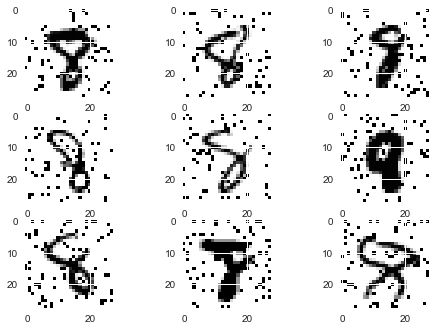

In [75]:
# False Positives
figure1 = plt.figure()
images = []

for i in range(len(FP_samples)):
    images.append(figure1.add_subplot(3,3,i+1))
    images[i].imshow(FP_data[i], cmap='Greys', vmin=0.0, vmax=1.0)

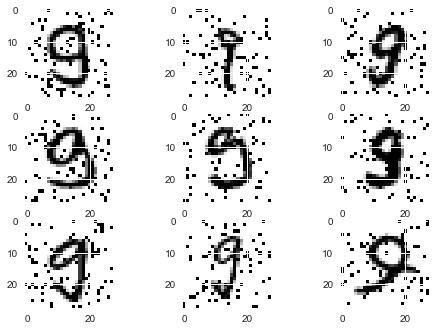

In [76]:
# False Negatives
figure2 = plt.figure()
images = []

for i in range(len(FN_samples)):
    images.append(figure2.add_subplot(3,3,i+1))
    images[i].imshow(FN_data[i], cmap='Greys', vmin=0.0, vmax=1.0)

### Discussion of Plot Results:

The sample images that the classifier labeled as false positives demonstrate the mistakes that the classifier is making. Since our output data is a binary label, we expect that the classifier labels images of 8's as 0's and labels images of 9's as 1's. This means that false positives are images of 8's that the classifier labeled as 9's. Thus, it seems that the classifier resulted in false positives when there were 8's that looked like 9's. Specifically, 8's that had wide tops and skinny bottoms were misclassified as 9's. Therefore, the classifier generally makes mistakes on poorly drawn data.

Additionally, the plots of our sample images that the classifier labeled as false negatives demonstrate other mistakes that the classifier is making. Since our output data is a binary label, we expect that the classifier labels images of 8's as 0's and labels images of 9's as 1's. This means that false negatives are images of 9's that the classifier labeled as 8's. Thus, it seems that the classifier resulted in false negatives when there were 9's that looked like 8's. Specifically, 9's that were wide and had long hooks were misclassified as 8's. Therefore, the classifier generally makes mistakes on poorly drawn data.

### 1.5. Analyze Final Weights Produced by Your Classifier

Analyze all of the final weights produced by your classifier. Reshape the weight
coefficients into a (28 × 28) matrix, corresponding to the pixels of the original images, and
plot the result using imshow(), with colormap RdYlBu, vmin=-0.5, and vmax=0.5. Place
this plot into your PDF as a properly captioned figure. Below it, discuss what it shows.
Which pixels correspond to an 8 (have negative weights), and which correspond to a 9 (have
positive weights)? Why do you think this is the case?

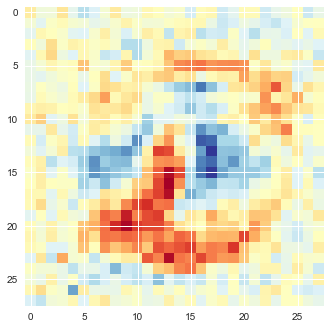

In [77]:
coefficients = coef_inverse
coefficients = reshape_dp(coefficients)

# Image Representation of Weights
plt.imshow(coefficients, cmap='RdYlBu', vmin=-0.5, vmax=0.5)

### Discussion of Plot Results:

The sample images that the classifier labeled as false positives demonstrate the mistakes that the classifier is making. Since our output data is a binary label, we expect that the classifier labels images of 8's as 0's and labels images of 9's as 1's. This means that false positives are images of 8's that the classifier labeled as 9's. Thus, it seems that the classifier resulted in false positives when there were 8's that looked like 9's. Specifically, 8's that had wide tops and skinny bottoms were misclassified as 9's. Therefore, the classifier generally makes mistakes on poorly drawn data.

Additionally, the plots of our sample images that the classifier labeled as false negatives demonstrate other mistakes that the classifier is making. Since our output data is a binary label, we expect that the classifier labels images of 8's as 0's and labels images of 9's as 1's. This means that false negatives are images of 9's that the classifier labeled as 8's. Thus, it seems that the classifier resulted in false negatives when there were 9's that looked like 8's. Specifically, 9's that were wide and had long hooks were misclassified as 8's. Therefore, the classifier generally makes mistakes on poorly drawn data.

## Part Two: Trousers v. Dresses

Description:

We have also provided some image data, in the same format as before, of trousers (output label 1)
and dresses (output label 0).¶ We have again given you input and output data for a training set,
along with input data only for a test set. Your task is to build a logistic regression classifier for
this data. Your PDF for this part will describe your approach and the results you see.

When doing regression, you should explore different feature transformations, transforming the
input features (in any way you see fit) that are given to the regression classifier. Your PDF should
explain, as completely as you are able, what feature transformations you tried, and what processes
you used to build your classifier (parameters you tried like regularization penalty, etc.), along with
the reasoning behind your decisions. Your work should contain at least two figures comparing the
results you get by regression using the original features of the data and some modified features.
Your discussion should include the error rate on the testing data for various models, provided when
you submit the model’s predictions on that data (see next section). Overall, the entire write-up for
this part of the assignment should take 2–3 pages, including figures.

For this part of the assignment, process is more important than raw results. A well-designed
set of tests, with coherent explanation and careful comparison of results will be worth more than
something that achieves 0 error, but is not explained clearly.

You may use any transformations of the existing data you like. Do not use any additional sources
of data; use only the input sets provided, and feature transformations on those sets. Be creative
in thinking about how to transform data; some ideas you might consider (we encourage you to try
other things as well):

• Consider things like histograms of parts of the data.

• Consider adding features that count overall numbers of white or black pixels.

• Consider adding features that capture spatial patterns in the original data.

• Consider exploring data augmentation, where you add to your data set via transformations
of the data. For example, if you flip each image horizontally, you can double the training set
size without needing fundamentally new data.

### Load the dataset.

In [270]:
x_train_clothes = np.loadtxt('./data_trouser_dress/troudress_train_x.csv', delimiter=',', skiprows=1)
x_test_clothes = np.loadtxt('./data_trouser_dress/troudress_test_x.csv', delimiter=',', skiprows=1)

y_train_clothes = np.loadtxt('./data_trouser_dress/troudress_train_y.csv', delimiter=',', skiprows=1)


## 2.1. Logistic Regression Model without Feature Transformation or Parameter Tuning

In [287]:
%%time

# Error Rate: 0.0675
# AUROC: 0.975417
# Time: 1.2 s

def log_reg_no_feature_transformation(training_input, training_output, testing_input):
    ''' Performs logistic regression on feature data representing dresses/trouser images
    
    Args
    ----
    training_input : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in training dataset
    training_output : 1D array of floats
        Each entry represents the binary value (0 or 1)
        One entry per example in training dataset
    testing_input : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in testing dataset

    Returns
    -------
    Nothing : 
        Creates txt file y_proba1.txt
        txt file represents one probability value per line/example from testing set
        
    '''
        
    # fitting logistic regression model
    log_reg = LogisticRegression(solver='liblinear')
    log_reg.fit(training_input, training_output)
        
    # calculating logistic loss
    probability = log_reg.predict_proba(testing_input)[:, 1]
    
    # save to txt file
    np.savetxt('yproba1_test.txt', probability)

# fitting logistic model with no feature transformation
log_reg_no_feature_transformation(x_train_clothes, y_train_clothes, x_test_clothes)

CPU times: user 1.21 s, sys: 46.3 ms, total: 1.26 s
Wall time: 1.23 s


## 2.2. Logistic Regression Model with Splitting Test and Training Sets 2:1

In [288]:
%%time

# Error Rate: 0.07799999999999996
# AUROC: 0.9711170000000001
# Time: 842 ms

def log_reg_split_2_1(training_input, training_output, testing_input):
    ''' Performs logistic regression on feature data representing dresses/trouser images with horizontal flips
    
    Args
    ----
    training_input : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in training dataset
    training_output : 1D array of floats
        Each entry represents the binary value (0 or 1)
        One entry per example in training dataset
    testing_input : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in testing dataset

    Returns
    -------
    Nothing : 
        Creates txt file y_proba1.txt
        txt file represents one probability value per line/example from testing set
        
    '''
    
    # splitting training and testing set (2:1)
    test_size = 0.33
    seed = 6
    x_train, x_test, y_train, y_test = model_selection.train_test_split(training_input, training_output, test_size=test_size, random_state=seed)
    
    # fitting logistic regression model
    log_reg = LogisticRegression(solver='liblinear')
    log_reg.fit(x_train, y_train)
        
    # calculating logistic loss
    probability = log_reg.predict_proba(testing_input)[:, 1]
    
    # save to txt file
    np.savetxt('yproba1_test.txt', probability)

# fitting logistic model with splitting training and testing sets 2:1
log_reg_split_2_1(x_train_clothes, y_train_clothes, x_test_clothes)

CPU times: user 825 ms, sys: 31.8 ms, total: 857 ms
Wall time: 806 ms


## 2.3. Logistic Regression Model with K-fold Cross Validation

In [289]:
%%time

# Error Rate: 0.0675
# AUROC: 0.9748030000000001
# Time: 6.39 s

def log_reg_k_fold(training_input, training_output, testing_input):
    ''' Performs logistic regression on feature data representing dresses/trouser images with horizontal flips
    
    Args
    ----
    training_input : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in training dataset
    training_output : 1D array of floats
        Each entry represents the binary value (0 or 1)
        One entry per example in training dataset
    testing_input : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in testing dataset

    Returns
    -------
    Nothing : 
        Creates txt file y_proba1.txt
        txt file represents one probability value per line/example from testing set
        
    '''

    # fitting logistic regression model with k-fold cross validation (10)
    log_reg = LogisticRegression(solver='liblinear')
    # 7 was best
    kfold = model_selection.KFold(n_splits=7)
    for train_index, test_index in kfold.split(training_input):
        x_train, x_test, y_train, y_test = training_input[train_index], training_input[test_index], training_output[train_index], training_output[test_index]
        log_reg.fit(x_train, y_train)
        
    # calculating logistic loss
    probability = log_reg.predict_proba(testing_input)[:, 1]
    
    # save to txt file
    np.savetxt('yproba1_test.txt', probability)

# fitting logistic model with k-fold cross validation
log_reg_k_fold(x_train_clothes, y_train_clothes, x_test_clothes)

CPU times: user 7.21 s, sys: 258 ms, total: 7.47 s
Wall time: 7.45 s


## 2.4. Logistic Regression Model with Total Black Pixels Feature

In [290]:
%%time

# Error Rate: 0.0655
# AUROC: 0.975356
# Time: 9 s

def add_black_pixels_feature(input_set):
    ''' Adds total black pixels to each input in the set
    
    Args
    ----
    input_set : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in training dataset

    Returns
    -------
    result : 1D array of pixel data
        Each entry except the last consists of pixel data from a (28 × 28) image with gray-scale values.
        Each last entry consists of the total black pixels in that set
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in training dataset
        
    '''
    result = []
    
    # go through each input
    for i in range(len(input_set)):
        image = []
        black = 0
        
        # go through image and track total black pixels
        for j in range(len(input_set[i])):
            image.append(input_set[i][j])
            if input_set[i][j] == 0:
                black += 1
         
        # add all features to result
        image.append(black)
        result.append(image)
        
    return np.array(result)


# add black pixels as feature
x_train_clothes_black = add_black_pixels_feature(x_train_clothes)
x_test_clothes_black = add_black_pixels_feature(x_test_clothes)


def log_reg_count_black_pixels(training_input, training_output, testing_input):
    ''' Performs logistic regression on feature data representing dresses/trouser images with horizontal flips
    
    Args
    ----
    training_input : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in training dataset
    training_output : 1D array of floats
        Each entry represents the binary value (0 or 1)
        One entry per example in training dataset
    testing_input : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in testing dataset

    Returns
    -------
    Nothing : 
        Creates txt file y_proba1.txt
        txt file represents one probability value per line/example from testing set
        
    '''
    # fitting logistic regression model
    log_reg = LogisticRegression(solver='liblinear')
    log_reg.fit(training_input, training_output)
        
    # calculating logistic loss
    probability = log_reg.predict_proba(testing_input)[:, 1]
    
    # save to txt file
    np.savetxt('yproba1_test.txt', probability)

# fitting logistic model with black pixels feature
log_reg_count_black_pixels(x_train_clothes_black, y_train_clothes, x_test_clothes_black)

CPU times: user 9.85 s, sys: 296 ms, total: 10.1 s
Wall time: 9.39 s


## 2.5. Logistic Regression Model with Total Black Pixels Feature and K-Fold Cross Validation

In [291]:
%%time

# Error Rate: 0.06799999999999995
# AUROC: 0.9748319999999999
# Time: 9.37 s

# fitting logistic model with black pixels feature and k-fold
log_reg_k_fold(x_train_clothes_black, y_train_clothes, x_test_clothes_black)

CPU times: user 9.83 s, sys: 279 ms, total: 10.1 s
Wall time: 10.1 s


## 2.6. Logistic Regression Model with Total White Pixels Feature

In [293]:
%%time

# Error Rate: 0.0665
# AUROC: 0.975471
# time: 8.64 s

def add_white_pixels_feature(input_set):
    ''' Adds total white pixels to each input in the set
    
    Args
    ----
    input_set : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in training dataset

    Returns
    -------
    result : 1D array of pixel data
        Each entry except the last consists of pixel data from a (28 × 28) image with gray-scale values.
        Each last entry consists of the total white pixels in that set
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in training dataset
        
    '''
    result = []
    
    # go through each input
    for i in range(len(input_set)):
        image = []
        white = 0
        
        # go through image and track total white pixels
        for j in range(len(input_set[i])):
            image.append(input_set[i][j])
            if input_set[i][j] == 1:
                white += 1
         
        # add all features to result
        image.append(white)
        result.append(image)
        
    return np.array(result)


# add white pixels as feature
x_train_clothes_white = add_white_pixels_feature(x_train_clothes)
x_test_clothes_white = add_white_pixels_feature(x_test_clothes)


def log_reg_count_white_pixels(training_input, training_output, testing_input):
    ''' Performs logistic regression on feature data representing dresses/trouser images with horizontal flips
    
    Args
    ----
    training_input : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in training dataset
    training_output : 1D array of floats
        Each entry represents the binary value (0 or 1)
        One entry per example in training dataset
    testing_input : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in testing dataset

    Returns
    -------
    Nothing : 
        Creates txt file y_proba1.txt
        txt file represents one probability value per line/example from testing set
        
    '''
    # fitting logistic regression model
    log_reg = LogisticRegression(solver='liblinear')
    log_reg.fit(training_input, training_output)
        
    # calculating logistic loss
    probability = log_reg.predict_proba(testing_input)[:, 1]
    
    # save to txt file
    np.savetxt('yproba1_test.txt', probability)

# fitting logistic model with white pixels feature
log_reg_count_white_pixels(x_train_clothes_white, y_train_clothes, x_test_clothes_white)

CPU times: user 9.4 s, sys: 261 ms, total: 9.66 s
Wall time: 8.86 s


## 2.7. Logistic Regression Model with Total White Pixels Feature and K-Fold Cross Validation

In [294]:
%%time

# Error Rate: 0.06799999999999995
# AUROC: 0.974727
# Time: 7.91 s

# fitting logistic model with white pixels feature and k-fold
log_reg_k_fold(x_train_clothes_white, y_train_clothes, x_test_clothes_white)

CPU times: user 8.54 s, sys: 269 ms, total: 8.8 s
Wall time: 7.95 s


## 2.8. Logistic Regression Model with Total Black and White Pixels Features

In [295]:
%%time

# Error Rate: 0.0655
# AUROC: 0.975356
# Time: 9 s

def add_black_and_white_pixels_feature(input_set):
    ''' Adds total black pixels to each input in the set
    
    Args
    ----
    input_set : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in training dataset

    Returns
    -------
    result : 1D array of pixel data
        Each entry except the last consists of pixel data from a (28 × 28) image with gray-scale values.
        Each last entry consists of the total black pixels in that set
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in training dataset
        
    '''
    result = []
    
    # go through each input
    for i in range(len(input_set)):
        image = []
        black = 0
        white = 0
        
        # go through image and track total black pixels
        for j in range(len(input_set[i])):
            image.append(input_set[i][j])
            if input_set[i][j] == 0:
                black += 1
            elif input_set[i][j] == 1:
                white += 1
         
        # add all features to result
        image.append(black)
        image.append(white)
        result.append(image)
        
    return np.array(result)

# add black and white pixels as feature
x_train_clothes_both = add_black_and_white_pixels_feature(x_train_clothes)
x_test_clothes_both = add_black_and_white_pixels_feature(x_test_clothes)

# fitting logistic model with black and white pixels feature
log_reg_count_black_pixels(x_train_clothes_both, y_train_clothes, x_test_clothes_both)

CPU times: user 10.4 s, sys: 207 ms, total: 10.6 s
Wall time: 10.6 s


## 2.9. Logistic Regression Model with Data Augmentation: Double Training Set by Flipping Images Horizontally

In [296]:
%%time

# Error Rate: 0.10650000000000004
# AUROC: 0.9556850000000001
# Time: 1.94 s

def flip_input_horizontally(input_set):
    ''' Flips input set of images horizontally and doubles the set
    
    Args
    ----
    input_set : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in training dataset

    Returns
    -------
    result : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        Double the size of the original training dataset
        
    '''
    result = []
    
    # add each input
    for i in range(len(input_set)):
        result.append(input_set[i])
        
    # add each input flipped
    for i in range(len(input_set)):
        new_elem = np.flipud(input_set[i]) 
        result.append(new_elem)
        
    return np.array(result)


def flip_output_horizontally(output_set):
    ''' Flips output set of images horizontally by doubling the set
    
    Args
    ----
    output_set : 1D array of floats
        Each entry represents the binary value (0 or 1)
        One entry per example in training dataset

    Returns
    -------
    result : 1D array of floats
        Each entry represents the binary value (0 or 1)
        Double the size of the original training dataset
        
    '''
    result = []
    
    # add each output twice
    for i in range(len(output_set)):
        result.append(output_set[i])
    for i in range(len(output_set)):
        result.append(output_set[i])
        
    return np.array(result)

# retrieve training sets doubled (flipped)
x_train_clothes_h = flip_input_horizontally(x_train_clothes)
y_train_clothes_h = flip_output_horizontally(y_train_clothes)


def log_reg_data_augmentation_h(training_input, training_output, testing_input):
    ''' Performs logistic regression on feature data representing dresses/trouser images with horizontal flips
    
    Args
    ----
    training_input : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in training dataset
    training_output : 1D array of floats
        Each entry represents the binary value (0 or 1)
        One entry per example in training dataset
    testing_input : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in testing dataset

    Returns
    -------
    Nothing : 
        Creates txt file y_proba1.txt
        txt file represents one probability value per line/example from testing set
        
    '''
    # fitting logistic regression model
    log_reg = LogisticRegression(solver='liblinear')
    log_reg.fit(training_input, training_output)
        
    # calculating logistic loss
    probability = log_reg.predict_proba(testing_input)[:, 1]
    
    # save to txt file
    np.savetxt('yproba1_test.txt', probability)

# fitting logistic model with data augmentation: flipping horizontally
log_reg_data_augmentation_h(x_train_clothes_h, y_train_clothes_h, x_test_clothes)

CPU times: user 1.86 s, sys: 109 ms, total: 1.97 s
Wall time: 1.95 s


## 2.10. Logistic Regression Model with Data Augmentation and K-Fold Cross Validation: Double Training Set by Flipping Images Horizontally

In [297]:
%%time

# Error Rate: 0.09799999999999998
# AUROC: 0.9597180000000001
# Time: 13 s

# fitting logistic model with data augmentation and k-fold: flipping horizontally
log_reg_k_fold(x_train_clothes_h, y_train_clothes_h, x_test_clothes)

CPU times: user 12.6 s, sys: 541 ms, total: 13.2 s
Wall time: 13.1 s


## 2.11. Logistic Regression Model with Data Augmentation: Guassian Radial Basis Function

In [298]:
%%time

# Error Rate: 0.07399999999999995
# AUROC: 0.9745249999999999
# Time: 1 min 13 sec

def gaussian_transformation(input_set):
    ''' Transforms input set with gaussian filter
    
    Args
    ----
    input_set : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in training dataset

    Returns
    -------
    result : 1D array of pixel data
        Half of the entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        The other half is the flattenned by guassian filter
    '''
    result = []
    
    # add each input
    for i in range(len(input_set)):
        result.append(input_set[i])
        
    # add each input filtered by guassian
    for i in range(len(input_set)):
        elem = reshape_dp(input_set[i])
        gaussian_elem = gaussian_filter(elem, 784)
        result.append(gaussian_elem.flatten())
        
    return np.array(result)


def gaussian_result(output_set):
    ''' Filters ouput through guassian by doubling the set
    
    Args
    ----
    output_set : 1D array of floats
        Each entry represents the binary value (0 or 1)
        One entry per example in training dataset

    Returns
    -------
    result : 1D array of floats
        Each entry represents the binary value (0 or 1)
        Double the size of the original training dataset
        
    '''
    result = []
    
    # add each output twice
    for i in range(len(output_set)):
        result.append(output_set[i])
    for i in range(len(output_set)):
        result.append(output_set[i])
        
    return np.array(result)

# apply gaussian to training sets
x_train_clothes_g = gaussian_transformation(x_train_clothes)
y_train_clothes_g = gaussian_result(y_train_clothes)


def log_reg_data_augmentation_g(training_input, training_output, testing_input):
    ''' Performs logistic regression on feature data representing dresses/trouser images with horizontal flips
    
    Args
    ----
    training_input : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in training dataset
    training_output : 1D array of floats
        Each entry represents the binary value (0 or 1)
        One entry per example in training dataset
    testing_input : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in testing dataset

    Returns
    -------
    Nothing : 
        Creates txt file y_proba1.txt
        txt file represents one probability value per line/example from testing set
        
    '''
    # fitting logistic regression model
    log_reg = LogisticRegression(solver='liblinear')
    log_reg.fit(training_input, training_output)
        
    # calculating logistic loss
    probability = log_reg.predict_proba(testing_input)[:, 1]
    
    # save to txt file
    np.savetxt('yproba1_test.txt', probability)

# fitting logistic model with data augmentation: applying gaussian
log_reg_data_augmentation_g(x_train_clothes_g, y_train_clothes_g, x_test_clothes)

CPU times: user 1min 14s, sys: 501 ms, total: 1min 15s
Wall time: 1min 14s


## 2.12. Logistic Regression Model with Data Augmentation and K-Fold Cross Validation: Guassian Radial Basis Function

In [299]:
%%time

# Error Rate: 0.07350000000000001
# AUROC: 0.9746370000000001
# Time: 21 sec

# fitting logistic model with data augmentation and k-fold: applying gaussian
log_reg_k_fold(x_train_clothes_g, y_train_clothes_g, x_test_clothes)

CPU times: user 22 s, sys: 979 ms, total: 23 s
Wall time: 22.2 s


## 2.13. Logistic Regression Model with Replaced White Pixels

CPU times: user 6.9 s, sys: 171 ms, total: 7.07 s
Wall time: 6.98 s


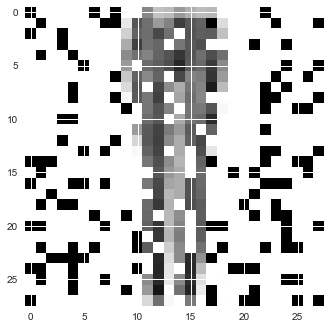

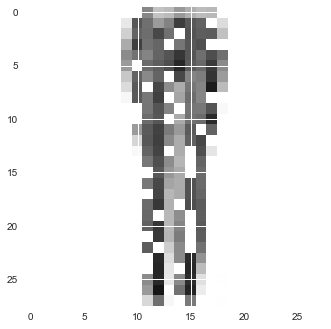

In [301]:
%%time

# Error Rate: 0.13949999999999996
# AUROC: 0.932117
# Time: 7.36 s

def replace_white_with_black(input_set):
    result = []
    for i in range(len(input_set)):
        image = []
        for j in range(len(input_set[i])):
            if input_set[i][j] == 1:
                image.append(0)
            else:
                image.append(input_set[i][j])
        result.append(image)
    return np.array(result)

before = reshape_dp(x_train_clothes[1])

figure1 = plt.figure()
images = []
images.append(figure1.add_subplot(1,1,1))
images[0].imshow(before, cmap='Greys', vmin=0.0, vmax=1.0)

x_train_clothes_wb = replace_white_with_black(x_train_clothes)

after = reshape_dp(x_train_clothes_wb[1])

figure1 = plt.figure()
images = []
images.append(figure1.add_subplot(1,1,1))
images[0].imshow(after, cmap='Greys', vmin=0.0, vmax=1.0)


def log_reg_replace_white_with_black(training_input, training_output, testing_input):
    ''' Performs logistic regression on feature data representing dresses/trouser images with horizontal flips
    
    Args
    ----
    training_input : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in training dataset
    training_output : 1D array of floats
        Each entry represents the binary value (0 or 1)
        One entry per example in training dataset
    testing_input : 1D array of pixel data
        Each entry consists of pixel data from a (28 × 28) image with gray-scale values.
        These gray-scale values lie between 0.0 (black) and 1.0 (white)
        One entry per example in testing dataset

    Returns
    -------
    Nothing : 
        Creates txt file y_proba1.txt
        txt file represents one probability value per line/example from testing set
        
    '''
    # fitting logistic regression model
    log_reg = LogisticRegression(solver='liblinear')
    log_reg.fit(training_input, training_output)
        
    # calculating logistic loss
    probability = log_reg.predict_proba(testing_input)[:, 1]
    
    # save to txt file
    np.savetxt('yproba1_test.txt', probability)
    
# fitting logistic model with replacing white pixels
log_reg_replace_white_with_black(x_train_clothes_wb, y_train_clothes, x_test_clothes)

## 2.14. Logistic Regression Model with Replaced White Pixels and K-Fold Cross Validation

In [302]:
%%time

# Error Rate: 0.13349999999999995
# AUROC: 0.9433950000000001
# Time: 6.16 s

# fitting logistic model with replacing white pixels and k-fold
log_reg_k_fold(x_train_clothes_wb, y_train_clothes, x_test_clothes)

CPU times: user 5.24 s, sys: 198 ms, total: 5.44 s
Wall time: 5.4 s
